In [1]:
import numpy as np
from scipy.integrate import solve_ivp


def reaction_system(t, y, k_I, k_p, k_td, k_tc):
    """
    反応系の微分方程式を定義する。
    
    パラメータ:
    t : float
        時間
    y : array_like
        現在の状態変数 [M, I, R1, R2, ..., P1, P2, ...]
    k_I, k_p, k_td, k_tc : float
        各反応速度定数
    
    戻り値:
    dydt : array_like
        状態変数の時間微分
    """
    M = y[0]  # モノマーMの濃度
    I = max(y[1], 0)  # 開始材Iの濃度（負の値を防ぐ）
    R = y[2 : num_intermediates + 2]  # 活性ポリマーの濃度配列

    # モノマーM、開始剤Iの濃度変化率
    dMdt = -M * (k_I * I + k_p * sum(R[: num_intermediates - 1]))
    dIdt = 0

    ############################
    # 活性ポリマーRの濃度変化率
    ############################
    # 再結合、不均化、モノマーとの反応による濃度減少分
    dRdt = (-2 * (k_td + k_tc) * np.sum(R) - k_p * M) * R

    # 開始剤による濃度増加分
    dRdt[0] += k_I * M * I

    # ポリマー成長による増加分
    for i in range(1, num_intermediates - 1):
        dRdt[i] += k_p * M * R[i - 1]
    dRdt[-1] += k_p * M * R[-1] + k_p * M * R[-2]

    ############################
    # ポリマーPの濃度変化率
    ############################
    dPdt = np.zeros(num_intermediates * 2)
    for i in range(num_intermediates):
        dPdt[2 * i] += k_td * R[i] * R[i]
        dPdt[i] += 2 * k_tc * R[i] * R[i]
        for j in range(i):
            dPdt[i + j] += 2 * k_td * R[i] * R[j]
            dPdt[i] += 2 * k_tc * R[i] * R[j]
            dPdt[j] += 2 * k_tc * R[i] * R[j]
    
    # 全ての変化率を連結して返す
    return np.concatenate(([dMdt], [dIdt], dRdt, dPdt))


# 初期条件
num_intermediates = 700  # 活性ポリマーの最大重合数
M0 = 1.0  # モノマーMの初期濃度
I0 = 0.0000001  # 開始材Iの初期濃度
R0 = np.zeros(num_intermediates)  # 活性ポリマーRの初期濃度
P0 = np.zeros(num_intermediates * 2)  # 生成物Pの初期濃度
y0 = np.concatenate(([M0], [I0], R0, P0))

# 時間範囲と反応速度定数
t_span = [0, 1.5]  # 時間範囲
t_eval = np.linspace(0, 1.5, 100)  # 結果を評価する時間点
k_I = 1000  # 反応速度定数 開始材
k_p = 1000  # 成長反応速度定数
k_td = 500000  # 反応停止速度定数 (再結合)
k_tc = 500000  # 反応停止速度定数 (不均化)

# solve_ivpで数値的に解を求める
sol = solve_ivp(
    reaction_system,    # 微分方程式を定義する関数
    t_span,             # 時間範囲
    y0,                 # 初期条件
    args=(k_I, k_p, k_td, k_tc),  # 反応速度定数の引数
    t_eval=t_eval,     # 結果を評価する時間点
    rtol=1e-7,          # 相対許容誤差
    atol=1e-12,         # 絶対許容誤差
)

KeyboardInterrupt: 

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 速度式を定義
def reaction_system(t, y, k_I, k_p, k_td, k_tc):
    M = y[0]
    I = max(y[1], 0)
    R = y[2]

    dMdt = -M * (k_I * I + k_p * R)
    dIdt = 0
    dRdt = k_I * M * I - 2 * (k_td + k_tc) * R**2

    K = M * k_p / (M * k_p + 2 * (k_td + k_tc) * R)
    i_array = np.array(range(num_intermediates * 2))

    dPdt = (i_array * k_td * (1 - K) + k_tc * K) * (1 - K) * K**(i_array - 1) * R**2
    return np.concatenate(([dMdt], [dIdt], [dRdt], dPdt))


# 初期条件
num_intermediates = 10000  # 中間体の数
M0 = 1.0  # 原料Aの初期濃度
I0 = 0.0000001  # 開始材Iの初期濃度
R0 = 0  # 中間体Bの初期濃度
P0 = np.zeros(num_intermediates * 2)  # 生成物Pの初期濃度
y0 = np.concatenate(([M0], [I0], [R0], P0))

# 時間範囲と反応速度定数
t_span = [0, 10000]  # 時間範囲
t_eval = np.linspace(0, 10000, 1001)
k_I = 1000.0  # 反応速度定数 開始材
k_p = 1000.0  # 成長反応速度定数
k_td = 500000.0  # 反応停止速度定数 (再結合)
k_tc = 500000.0  # 反応停止速度定数 (不均化)

# solve_ivpで数値的に解を求める
sol2 = solve_ivp(
    reaction_system,    # 微分方程式を定義する関数
    t_span,             # 時間範囲
    y0,                 # 初期条件
    args=(k_I, k_p, k_td, k_tc),  # 反応速度定数の引数
    t_eval=t_eval,     # 結果を評価する時間点
    rtol=1e-7,          # 相対許容誤差
    atol=1e-12,         # 絶対許容誤差
)

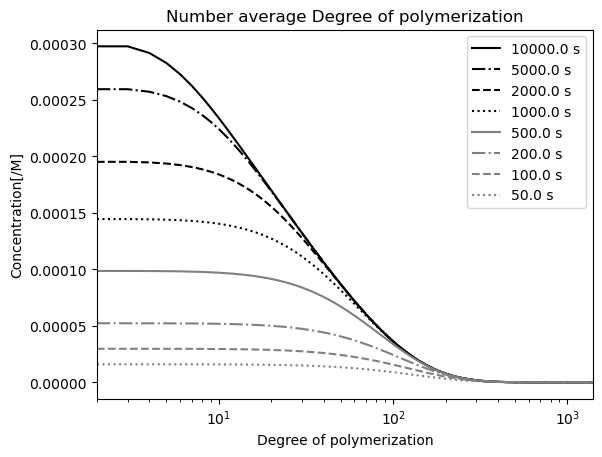

In [6]:
time_colors = [
    [1000, "black", "solid"],
    [500, "black", "dashdot"],
    [200, "black", "dashed"],
    [100, "black", "dotted"],
    [50, "gray", "solid"],
    [20, "gray", "dashdot"],
    [10, "gray", "dashed"],
    [5, "gray", "dotted"],
]

for time, color, linestyle in time_colors:
    plt.plot(
        range(2, 10000 * 2 + 2),
        [i[time] for i in sol2.y[3:]],
        label=sol2.t[time].astype("U") + " s",
        color=color,
        linestyle=linestyle,
    )
    
plt.legend()
plt.title("Number average Degree of polymerization")
plt.xlabel("Degree of polymerization")
plt.ylabel("Concentration[/M]")
plt.xlim(2, 1400)
plt.xscale("log")
plt.savefig("Mw2f.pdf")
plt.show()

In [7]:
import sympy

# 文字列の定義
R = sympy.Symbol('R', real=True)
K = sympy.Symbol('K', real=True)
i = sympy.Symbol('i', integer=True)

# 等比数列の和を計算
sympy.summation(K**(i-1)*R, (i, 1, sympy.oo)).simplify()

Piecewise((-R/(K - 1), (K > -1) & (K < 1)), (R*Sum(K**(i - 1), (i, 1, oo)), True))